In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Descarga de datos
sp500 = yf.download('^GSPC', auto_adjust=True, progress=False)['Close'].to_frame()

# Parametrizacion del script
target = 2  # Para ver cuando ha duplicado, podria ser 1.5 para ver cuando ha crecido +50%
days = 1000  # El plazo para 

# Calculos
sp500['from_min'] = sp500.Close.rolling(days).min()
sp500['cond'] = np.where(sp500['Close']/sp500['from_min'] > target,1,0)
sp500['cond'] = np.where((sp500['cond']==1) & (sp500['cond'].shift()!=1), 1,0)
sp500['days_target'] = days - sp500.Close.rolling(days).apply(np.argmin)
sp500['ROI %'] = target** (365/(sp500['days_target']*365/250)) -1
sp500['year'] = sp500.index.year.astype(int)

# Mascara y filtro
eventos = sp500.loc[sp500['cond']==1].copy()
eventos['years_prev'] =  eventos['year'] - eventos['year'].shift()
eventos.fillna(10, inplace=True)
mask = np.where(eventos['years_prev'] >2, True,False)
print(f'\n   Bull-Runs que alcanzaron {target}x en menos de {days} dias \n')
eventos[mask].iloc[:,:-1].round(4)


   Bull-Runs que alcanzaron 2x en menos de 1000 dias 



,Close,from_min,cond,days_target,ROI %,year
Date,,,,,,
1955-09-14,44.99,22.4000,1,957.0,0.1985,1955
1985-12-11,206.31,102.4200,1,844.0,0.2279,1985
1997-06-12,883.46,438.9200,1,808.0,0.2392,1997
2011-04-27,1355.66,676.5300,1,540.0,0.3784,2011
2021-08-16,4479.71,2237.3999,1,354.0,0.6315,2021


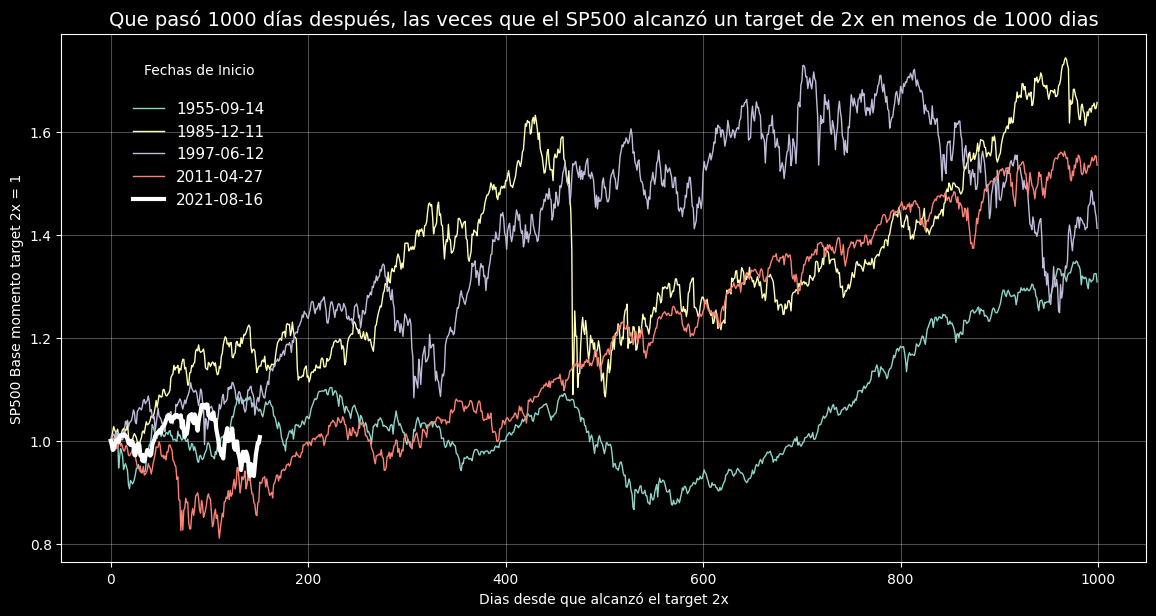

In [ ]:
idxs = eventos[mask].index
df= pd.concat([(sp500.loc[x:].iloc[:1000]['Close']/sp500.loc[x]['Close']).reset_index()['Close'] for x in idxs], axis=1)

plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(df.iloc[:,:-1], lw=1)
ax.plot(df.iloc[:,-1], lw=3, color='white')
ax.legend(idxs.date, title='\nFechas de Inicio\n', frameon=False, bbox_to_anchor=[0.2, 1], fontsize=11)
ax.grid(alpha=0.3)
t = f'Que pasó 1000 días después, las veces que el SP500 alcanzó un target de {target}x en menos de {days} dias'
ax.set_title(t, fontsize=14)
ax.set_xlabel(f'Dias desde que alcanzó el target {target}x')
ax.set_ylabel(f'SP500 Base momento target {target}x = 1')
plt.show()